In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, r2_score, mean_squared_error

In [33]:
df_WB = pd.read_csv("WB_development_indicators.csv")
# Clean naming conventions of columns
df_WB.columns = df_WB.columns.str.lower().str.replace(' ', '_')

df_WB['date'] = pd.to_datetime(df_WB['date'])
df_WB['year'] = df_WB['date'].dt.year

# Select rows we are interested in
WB_cols = [
    'country',
    'year',
    'population',
    'gdp_current_us', 
    'tax_revenue%', 
    'control_of_corruption_estimate', 
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'military_expenditure%',
    'inflation_annual%',
    'political_stability_estimate',
    'individuals_using_internet%',
    'rural_population'
]
df_WB = df_WB[WB_cols]

# Add a GDP per Capita column
df_WB['gdp_per_capita'] = df_WB['gdp_current_us'] / df_WB['population']

df_WB


,country,year,population,gdp_current_us,tax_revenue%,control_of_corruption_estimate,government_expenditure_on_education%,government_health_expenditure%,military_expenditure%,inflation_annual%,political_stability_estimate,individuals_using_internet%,rural_population,gdp_per_capita
0,Afghanistan,1960,8622466.0,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7898093.0,62.369375
1,Afghanistan,1961,8790140.0,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8026804.0,62.443703
2,Afghanistan,1962,8969047.0,5.466667e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8163985.0,60.950364
3,Afghanistan,1963,9157465.0,7.511112e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8308019.0,82.021738
4,Afghanistan,1964,9355514.0,8.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8458694.0,85.511073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17267,Zimbabwe,2019,15354608.0,2.183223e+10,NaN,-1.271190,NaN,0.522077,0.729567,255.304991,-0.943286,26.588274,10408889.0,1421.868596
17268,Zimbabwe,2020,15669666.0,2.150970e+10,NaN,-1.287992,NaN,0.756783,0.261761,557.201817,-1.052728,29.298565,10617452.0,1372.696674
17269,Zimbabwe,2021,15993524.0,2.837124e+10,NaN,-1.253550,NaN,NaN,0.815977,98.546105,-0.954426,34.813971,10827136.0,1773.920411
17270,Zimbabwe,2022,16320537.0,2.736663e+10,NaN,-1.255139,NaN,NaN,0.427057,104.705171,-0.884500,NaN,11033499.0,1676.821489


In [34]:
df_WID = pd.read_csv("gini-coefficient.csv")
df_WID.columns = df_WID.columns.str.lower().str.replace(' ', '_')
df_WID = df_WID.rename(columns={
    'gini_coefficient_(before_tax)_(world_inequality_database)': 'gini_pretax',
    'p0p100_gini_posttax_nat': 'gini_posttax',

    'income_share_of_the_poorest_50%_(before_tax)_(world_inequality_database)': 'bot_50_share_pretax',
    'p0p50_share_posttax_nat': 'bot_50_share_posttax',

    'income_share_of_the_richest_10%_(before_tax)_(world_inequality_database)': 'top_10_share_pretax',
    'p90p100_share_posttax_nat': 'top_10_share_posttax',

    'income_share_of_the_richest_1%_(before_tax)_(world_inequality_database)': 'top_1_share_pretax',
    'p99p100_share_posttax_nat': 'top_1_share_posttax',


})

WID_cols = [
    'country', 'year',
    'gini_pretax', 'gini_posttax',
    'bot_50_share_pretax', 'bot_50_share_posttax',
    'top_10_share_pretax', 'top_10_share_posttax',
    'top_1_share_pretax', 'top_1_share_posttax'
]
df_WID = df_WID[WID_cols]
df_WID

,country,year,gini_pretax,gini_posttax,bot_50_share_pretax,bot_50_share_posttax,top_10_share_pretax,top_10_share_posttax,top_1_share_pretax,top_1_share_posttax
0,Afghanistan,1980,NaN,0.519921,NaN,17.485650,NaN,41.727030,NaN,16.163332
1,Afghanistan,1981,NaN,0.519936,NaN,17.484886,NaN,41.728653,NaN,16.164585
2,Afghanistan,1982,NaN,0.519852,NaN,17.490180,NaN,41.723576,NaN,16.161942
3,Afghanistan,1983,NaN,0.519883,NaN,17.488247,NaN,41.725838,NaN,16.163237
4,Afghanistan,1984,NaN,0.519923,NaN,17.485708,NaN,41.728313,NaN,16.164446
...,...,...,...,...,...,...,...,...,...,...
9705,Zimbabwe,2015,NaN,0.607439,NaN,12.495727,NaN,49.302017,NaN,15.467173
9706,Zimbabwe,2016,NaN,0.610155,NaN,12.418008,NaN,49.743030,NaN,15.704815
9707,Zimbabwe,2017,0.635799,0.615616,11.25,12.196863,52.569996,50.441742,17.48,16.088750
9708,Zimbabwe,2019,0.685154,NaN,9.23,NaN,58.950000,NaN,21.08,NaN


In [35]:
merged_df = pd.merge(df_WB, df_WID, on=['country', 'year'], how='inner')
df_modern = merged_df[(merged_df['year'] >= 2000) & (merged_df['year'] <= 2022)].copy()
final_cols = [
    'country', 'year', 'gdp_per_capita', 'tax_revenue%', 
    'control_of_corruption_estimate', 'government_expenditure_on_education%',
    'gini_posttax' # Your Target Variable
]
df_modern


,country,year,population,gdp_current_us,tax_revenue%,control_of_corruption_estimate,government_expenditure_on_education%,government_health_expenditure%,military_expenditure%,inflation_annual%,...,rural_population,gdp_per_capita,gini_pretax,gini_posttax,bot_50_share_pretax,bot_50_share_posttax,top_10_share_pretax,top_10_share_posttax,top_1_share_pretax,top_1_share_posttax
20,Afghanistan,2000,19542982.0,NaN,NaN,-1.271724,NaN,NaN,NaN,NaN,...,15228282.0,NaN,NaN,0.520353,NaN,17.459345,NaN,41.753720,NaN,16.178635
21,Afghanistan,2001,19688632.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15323859.0,NaN,NaN,0.520365,NaN,17.458641,NaN,41.754475,NaN,16.179062
22,Afghanistan,2002,21000256.0,3.825701e+09,NaN,-1.251137,NaN,0.084181,NaN,NaN,...,16325389.0,182.174037,NaN,0.520443,NaN,17.453497,NaN,41.759040,NaN,16.181198
23,Afghanistan,2003,22645130.0,4.520947e+09,NaN,-1.344180,NaN,0.650963,NaN,NaN,...,17583264.0,199.643228,NaN,0.517376,NaN,17.652820,NaN,41.582405,NaN,16.096697
24,Afghanistan,2004,23553551.0,5.224897e+09,NaN,-1.350647,NaN,0.542926,2.431254,NaN,...,18254002.0,221.830531,NaN,0.516920,NaN,17.684317,NaN,41.566208,NaN,16.097794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Zimbabwe,2015,14154937.0,1.996312e+10,17.673363,-1.337617,NaN,1.550902,1.886309,-2.430968,...,9570861.0,1410.329173,NaN,0.607439,NaN,12.495727,NaN,49.302017,NaN,15.467173
6519,Zimbabwe,2016,14452704.0,2.054868e+10,15.458341,-1.288441,NaN,1.581913,1.741985,-1.543670,...,9785059.0,1421.787791,NaN,0.610155,NaN,12.418008,NaN,49.743030,NaN,15.704815
6520,Zimbabwe,2017,14751101.0,1.758489e+10,15.874375,-1.298485,5.81878,1.598481,1.592340,0.893962,...,9995789.0,1192.107012,0.635799,0.615616,11.25,12.196863,52.569996,50.441742,17.48,16.088750
6521,Zimbabwe,2019,15354608.0,2.183223e+10,NaN,-1.271190,NaN,0.522077,0.729567,255.304991,...,10408889.0,1421.868596,0.685154,NaN,9.23,NaN,58.950000,NaN,21.08,NaN


Standard Deviation of Corruption (Imputed): 0.9573
Standard Deviation of Corruption (Dropped): 1.0317


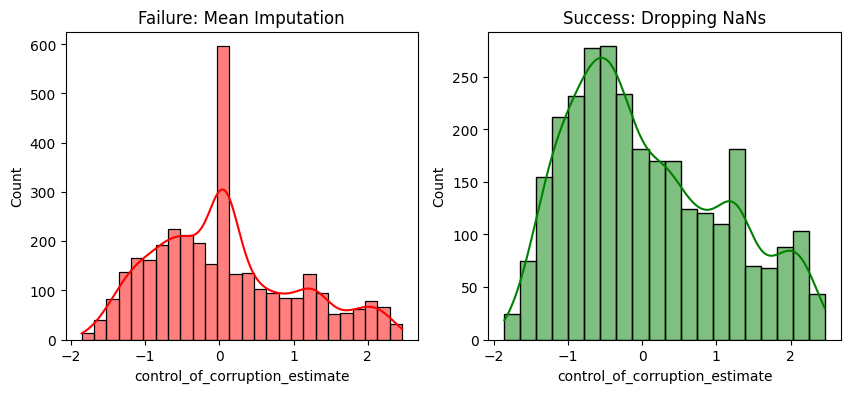

In [36]:
#First Experiment

# Fill missing tax/corruption data with the global average
df_imputed = df_modern.copy()
df_imputed['control_of_corruption_estimate'] = df_imputed['control_of_corruption_estimate'].fillna(df_imputed['control_of_corruption_estimate'].mean())

# Drop Missing
df_dropped = df_modern.dropna(subset='control_of_corruption_estimate')

print(f"Standard Deviation of Corruption (Imputed): {df_imputed['control_of_corruption_estimate'].std():.4f}")
print(f"Standard Deviation of Corruption (Dropped): {df_dropped['control_of_corruption_estimate'].std():.4f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_imputed['control_of_corruption_estimate'], kde=True, color='red')
plt.title("Failure: Mean Imputation")

plt.subplot(1, 2, 2)
sns.histplot(df_dropped['control_of_corruption_estimate'], kde=True, color='green')
plt.title("Success: Dropping NaNs")
plt.show()

Number of rows with full data: 1105
R-Squared (Predicting Pre-Tax Gini):  0.1774
R-Squared (Predicting Post-Tax Gini): 0.2649


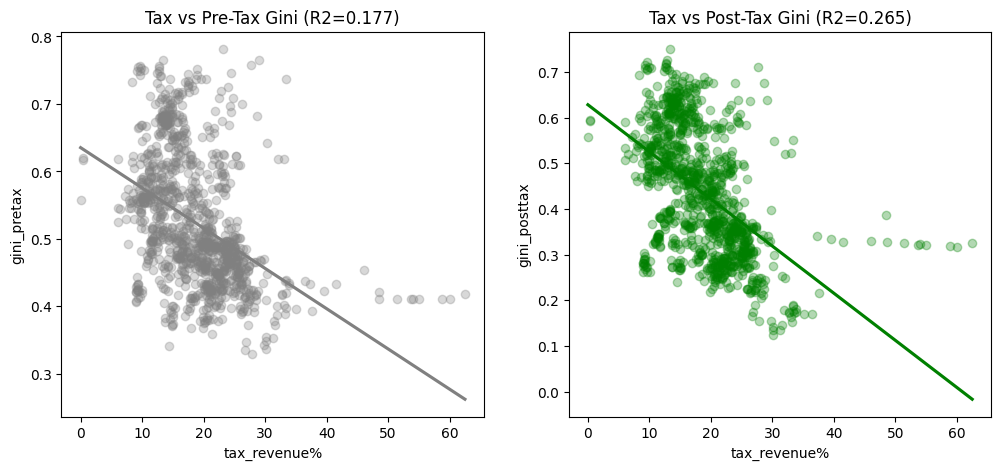

In [40]:
# Testing whether to use pre or post tax gini

# Prepare a Common dataset using tax revenue
cols_for_exp5 = ['tax_revenue%', 'gini_pretax', 'gini_posttax']
df_exp5_clean = df_modern[cols_for_exp5].dropna()

print(f"Number of rows with full data: {len(df_exp5_clean)}")

X_common = df_exp5_clean[['tax_revenue%']]
y_pre_common = df_exp5_clean['gini_pretax']
y_post_common = df_exp5_clean['gini_posttax']

model_pre = LinearRegression().fit(X_common, y_pre_common)
r2_pre = r2_score(y_pre_common, model_pre.predict(X_common))

model_post = LinearRegression().fit(X_common, y_post_common)
r2_post = r2_score(y_post_common, model_post.predict(X_common))

# Print Results
print(f"R-Squared (Predicting Pre-Tax Gini):  {r2_pre:.4f}")
print(f"R-Squared (Predicting Post-Tax Gini): {r2_post:.4f}")

# Visualization to prove it
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x=X_common['tax_revenue%'], y=y_pre_common, scatter_kws={'alpha':0.3}, color='gray', ci=None)
plt.title(f"Tax vs Pre-Tax Gini (R2={r2_pre:.3f})")

plt.subplot(1, 2, 2)
sns.regplot(x=X_common['tax_revenue%'], y=y_post_common, scatter_kws={'alpha':0.3}, color='green', ci=None)
plt.title(f"Tax vs Post-Tax Gini (R2={r2_post:.3f})")

plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler

print("--- CLUSTERED REGRESSION ANALYSIS ---")

final_features = [
    'gdp_per_capita', 
    'tax_revenue%', 
    'control_of_corruption_estimate', 
    'government_expenditure_on_education%', 
    'government_health_expenditure%'
]
target = 'gini_posttax'

# Create the final clean dataframe
df_final = df_modern[final_features + [target, 'country', 'year']].dropna()
# Remove extreme outliers 
df_final = df_final[df_final['gdp_per_capita'] < 80000] 

# Clustering
# Scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final[final_features])

# Run K-Means 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(X_scaled)

# Analyzing the Clusters
print("\n--- Cluster Profiles (Average Values) ---")
print(df_final.groupby('cluster')[final_features + [target]].mean())

print("\n--- Cluster Regression -------")

# 4. RUN REGRESSION PER CLUSTER (The "Depth" Analysis)
for cluster_id in sorted(df_final['cluster'].unique()):
    # Filter for just this cluster
    df_cluster = df_final[df_final['cluster'] == cluster_id]
    
    # Define X and y
    X_cluster = df_cluster[final_features]
    y_cluster = df_cluster[target]
    
    # Train Model
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    
    # Make Predictions
    y_pred = model.predict(X_cluster)
    
    # Print Insights 
    print(f"\nCLUSTER {cluster_id} (n={len(df_cluster)} countries):")
    print(f"R-Squared: {r2_score(y_cluster, y_pred):.4f}")
    
    # Show coefficients
    coef_df = pd.DataFrame({
        'Feature': final_features,
        'Coefficient': model.coef_
    })
    coef_df['Abs_Impact'] = coef_df['Coefficient'].abs()
    print(coef_df.sort_values('Abs_Impact', ascending=False)[['Feature', 'Coefficient']])

--- CLUSTERED REGRESSION ANALYSIS ---

--- Cluster Profiles (Average Values) ---
         gdp_per_capita  tax_revenue%  control_of_corruption_estimate  \
cluster                                                                 
0           3154.809544     12.673538                       -0.633359   
1          46127.664052     21.415944                        1.832220   
2          11590.474110     20.419877                        0.328574   

         government_expenditure_on_education%  government_health_expenditure%  \
cluster                                                                         
0                                    3.364797                        1.745111   
1                                    5.705394                        6.883404   
2                                    5.347857                        4.306418   

         gini_posttax  
cluster                
0            0.567408  
1            0.312114  
2            0.466035  

--- Cluster Regression ---